In [2]:
# run import from reference script (pandas, numpy, ect)
import sys
sys.path.append('C:\\Users\\dmcdade\\Documents\\Python Scripts\\references')
from base_import import *
%matplotlib inline

from pandasql import *
def pysqldf(q):
    return sqldf(q, globals())

In [3]:
import sklearn
# some of the most useful processes
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Imputer
from patsy import dmatrices

In [ ]:
#################################################################
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# imputer = Imputer(strategy='median', missing_values=-1)
# scalar = StandardScaler()
# pca = PCA()
# classifier = RandomForestClassifier(n_estimators=100)
# params = {
#    'pca__n_components': np.arange(2,features.shape[1]+1).tolist() ,
#    'clf__criterion':['gini','entropy'],
#    'clf__max_features': [0.75, 0.8, 0.9],
#    'clf__max_depth': [3.75, 3.9, 4, 4.1],
#    'clf__min_samples_split': [2, 10, 50],
#}
# pipeline = Pipeline([
#    ('scl', scalar),
#    ('imp', imputer),
#    ('pca', pca),
#    ('clf', classifier),
# ])
# gs = GridSearchCV(pipeline, params, cv=10, scoring='roc_auc')
# gs.fit(features.values, target)
# print gs.best_score_
# print gs.best_params_
# predictions = gs.predict(X_test)
# classification_report(y_test , predictions)
#################################################################

### load boston data

In [3]:
# load boston data
from sklearn.datasets import load_boston
sklearn_boston = load_boston()
data = pd.DataFrame(data=sklearn_boston.data, columns=sklearn_boston.feature_names)
data['target'] = sklearn_boston.target # mean house value
print sklearn_boston.DESCR[:-1000] + '  .......(cont)'

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

C:\Users\dmcdade\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


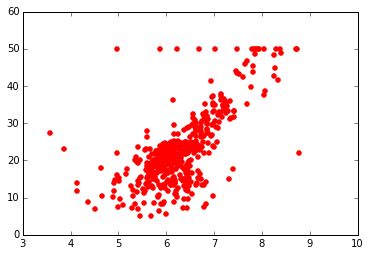

In [4]:
from matplotlib import pyplot as plt
plt.scatter(sklearn_boston.data[:,5], sklearn_boston.target, color='r')

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


### pulling data

In [7]:
# pandas remote data http://pandas.pydata.org/pandas-docs/stable/remote_data.html
# includes connectors for FRED, FamaFrench, world bank, google analytics
import pandas.io.data as web
# ip = web.DataReader("5_Industry_Portfolios", "famafrench") ; from pandas.io import wb; 
##
# import datetime
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2013, 1, 27)
# f = web.DataReader("F", 'yahoo', start, end)
# options 
# from pandas.io.data import Options
# aapl = Options('aapl', 'yahoo')

In [4]:
import urllib2
import pytz
import pandas as pd

from bs4 import BeautifulSoup
from datetime import datetime
import pandas.io.data as web


WIKI_SITE = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
CBOE_SITE = "http://www.cboe.com/products/snp500.aspx"
START = datetime(1900, 1, 1, 0, 0, 0, 0, pytz.utc)
END = datetime.today().utcnow()

# Two scraper functions because i thought they were wrong but they arent

def scrape_list(site):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = urllib2.Request(site, headers=hdr)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page)
    table = soup.find('table', {'class': 'table'})
    sector_tickers = pd.DataFrame()
    for row in table.findAll('tr'):
        row_vals = [col.text.strip().replace('\n','').replace('\t','') for col in row.findAll('td')]
        if row_vals != ['']*len(row_vals):
            sector_tickers = sector_tickers.append(pd.DataFrame(data=[row_vals])).reset_index(drop=True)
    sector_tickers.columns = sector_tickers.ix[0]
    sector_tickers = sector_tickers.ix[1:].reset_index(drop=True)
    return sector_tickers

def scrape_wiki_list(site):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = urllib2.Request(site, headers=hdr)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page)
    table = soup.find('table', {'class': 'wikitable sortable'})
    sector_tickers = pd.DataFrame()
    # get data
    for row in table.findAll('tr'):
        row_vals = [col.text.strip().replace('\n','').replace('\t','') for col in row.findAll('td')]
        if row_vals != ['']*len(row_vals):
            sector_tickers = sector_tickers.append(pd.DataFrame(data=[row_vals])).reset_index(drop=True)
    sector_tickers.columns = ['ticker', 'security', 'sec_filings', 'sector', 'sub_industry', 
                              'hq', 'date_added', 'cik']
    #sector_tickers = sector_tickers.ix[1:].reset_index(drop=True)
    return sector_tickers

def download_ohlc(sector_tickers, start, end):
    sector_ohlc = {}
    for sector, tickers in sector_tickers.iteritems():
        print 'Downloading data from Yahoo for %s sector' % sector
        data = web.DataReader(tickers, 'yahoo', start, end)
        for item in ['Open', 'High', 'Low']:
            data[item] = data[item] * data['Adj Close'] / data['Close']
        data.rename(items={'Open': 'open', 'High': 'high', 'Low': 'low',
                           'Adj Close': 'close', 'Volume': 'volume'},
                    inplace=True)
        data.drop(['Close'], inplace=True)
        sector_ohlc[sector] = data
    print 'Finished downloading data'
    return sector_ohlc


def store_HDF5(sector_ohlc, path):
    with pd.get_store(path) as store:
        for sector, ohlc in sector_ohlc.iteritems():
            store[sector] = ohlc


def get_snp500():
    sector_tickers = scrape_list(SITE)
    sector_ohlc = download_ohlc(sector_tickers, START, END)
    store_HDF5(sector_ohlc, 'snp500.h5')


#if __name__ == '__main__':
#    get_snp500()

C:\Users\dmcdade\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
scrape_list(CBOE_SITE)
wiki_500 = scrape_wiki_list(WIKI_SITE)

In [49]:
datetime(1900, 1, 1, 0, 0, 0, 0, pytz.utc)

datetime.datetime(1900, 1, 1, 0, 0, tzinfo=<UTC>)

In [51]:
mm_data = web.DataReader('MMM', 'yahoo', datetime(1900, 1, 1, 0, 0, 0, 0, pytz.utc), datetime.today().utcnow())

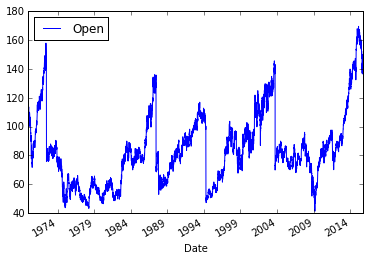

In [57]:
mm_data[['Open']].plot()

In [ ]:
from sklearn.linear_model import SGDRegressor

In [8]:
wiki_500.sector.value_counts()

Financials                     88
Consumer Discretionary         87
Information Technology         68
Industrials                    68
Health Care                    55
Energy                         40
Consumer Staples               37
Utilities                      29
Materials                      28
Telecommunications Services     5
Name: sector, dtype: int64